In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import astropy.units as u

import sys
sys.path.insert(0, '../')
from mrspoc import Star, Spot

In [2]:
stellar_inclinations = [0, 90]
rotation_angles = np.linspace(0, 360, 10)

In [3]:
# # Units of degrees: 
# rotation_angle = 0

# total_fluxes = []
# total_fluxes_analytic = []
# all_centroids = []

# import time
# start = time.time()

# for stellar_inclination in stellar_inclinations:
#     total_flux = []
#     total_flux_analytic = []
#     centroids = []
#     for rotation_angle in rotation_angles:
#         spots = [Spot.from_latlon(15, 0+rotation_angle, stellar_inclination, 0.05), 
#                  Spot.from_latlon(-15, 120+rotation_angle, stellar_inclination, 0.05),
#                  Spot.from_latlon(15, 240+rotation_angle, stellar_inclination, 0.05)]

#         spots = [spot for spot in spots if spot is not None]

#         star = Star(spots=spots)

#         #x_c, y_c, image = star._centroid_numerical(return_image=True) # 20 seconds for 10 rot angles, 2 inclinations

#         x_c, y_c, analytic_flux = star._centroid_analytic(return_total_flux=True) # .2 secs for 10 rot angles, 2 inclinations

#         total_flux.append(np.sum(image))
#         total_flux_analytic.append(analytic_flux)
        
#         centroids.append([x_c, y_c])
# #         fig, ax = plt.subplots()
# #         ax.imshow(image, origin='lower', interpolation='nearest',
# #                   cmap=plt.cm.Greys_r, extent=[-1, 1, -1, 1])
# #         ax.set_xlim([-1, 1])
# #         ax.set_ylim([-1, 1])
# #         ax.set_xlabel('x [$R_\star$]', fontsize=14)
# #         ax.set_ylabel('y [$R_\star$]', fontsize=14)
# #         fig.savefig('animation/is{0:02d}_{1:03d}.png'
# #                     .format(int(stellar_inclination), int(rotation_angle)), 
# #                     dpi=150, bbox_inches='tight')
# #         plt.close()
#     all_centroids.append(centroids)
#     total_fluxes.append(total_flux)
#     total_fluxes_analytic.append(total_flux_analytic)

# end = time.time()
# print('time: {0}s'.format(end-start))
# all_centroids = np.array(all_centroids)

In [4]:
# divisor = 1e-4
# fig, ax = plt.subplots(2, 2, figsize=(6, 6), sharey='row', sharex='row')
# ax[0, 0].plot(rotation_angles, total_fluxes[0]/np.median(total_fluxes[0]), color='C0')
# ax[0, 1].plot(rotation_angles, total_fluxes[1]/np.median(total_fluxes[1]), color='C1')

# # ax[0, 0].plot(rotation_angles, total_fluxes_analytic[0]/np.median(total_fluxes_analytic[0]), color='C2', ls='--')
# # ax[0, 1].plot(rotation_angles, total_fluxes_analytic[1]/np.median(total_fluxes_analytic[1]), color='C3', ls='--')

# ax[0, 0].set_yticklabels(["{0:6f}".format(i) for i in ax[0, 0].get_yticks()])
# ax[0, 0].set_title('$i_\star = 0^\circ$')
# ax[0, 1].set_title('$i_\star = 90^\circ$')
# ax[0, 0].set_ylabel('Flux')
# for axis in ax[0, :]:
#     axis.set_xlabel('Rotation Phase [deg]')

# ax[1, 0].scatter(all_centroids[0, :, 0]/divisor, all_centroids[0, :, 1]/divisor, color='C0')
# ax[1, 1].scatter(all_centroids[1, :, 0]/divisor, all_centroids[1, :, 1]/divisor, color='C1')

# ax[1, 0].set_ylabel('$y \; [R_\star / {0:d}]$'.format(int(1/divisor)))

# for axis in ax[1, :]:
#     axis.set_xlabel('$x \; [R_\star / {0:d}]$'.format(int(1/divisor)))
#     axis.set_ylim([-0.0004/divisor, 0.0004/divisor])
#     axis.set_xlim([-0.0004/divisor, 0.0004/divisor])
#     axis.set_aspect('equal')
#     axis.set_xlabel('$x \; [R_\star / {0:d}]$'.format(int(1/divisor)))

# ax[1, 0].set_ylabel('$y \; [R_\star{0:d}]$'.format(int(1/divisor)))
# #ax[1, 0].set_yticklabels(["{0:6f}".format(i) for i in ax[1, 0].get_yticks()])

# fig.subplots_adjust(wspace=0.01, hspace=0.3)
# fig.savefig('animation/light_curve.png', bbox_inches='tight', dpi=250)

In [5]:
stellar_inclinations = np.linspace(0, 90, 10)
rotation_angles = np.linspace(0, 360, 30)

total_fluxes = []

all_centroids = []

for stellar_inclination in stellar_inclinations:
    total_flux = []
    centroids = []
    for rotation_angle in rotation_angles:
        spots = [Spot.from_latlon(15, 0+rotation_angle, stellar_inclination, 0.05), 
                 Spot.from_latlon(-15, 120+rotation_angle, stellar_inclination, 0.05),
                 Spot.from_latlon(15, 240+rotation_angle, stellar_inclination, 0.05)]

        #spots = [spot for spot in spots if spot is not None]

        star = Star(spots=spots, inclination=stellar_inclination)

        x_c, y_c, analytic_flux = star._centroid_analytic(return_total_flux=True)
        
        total_flux.append(analytic_flux)
        centroids.append([x_c, y_c])

    all_centroids.append(centroids)
    total_fluxes.append(total_flux)
    
all_centroids = np.array(all_centroids)

(-1e-05, 0.0002)

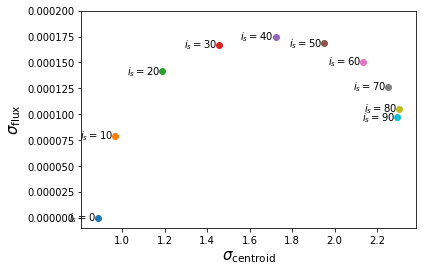

In [6]:
divisor = 1e-4

for i, i_s in enumerate(stellar_inclinations):
    x = np.std(all_centroids[i, :, 0]/divisor)
    #x = np.std(np.sqrt(all_centroids[i, :, 0]**2 + all_centroids[i, :, 1]**2))
    y = np.std(total_fluxes[i]/np.median(total_fluxes[i]))
    plt.scatter(x, y, label='$i_\star = {0:d}$'.format(int(i_s)))
    plt.annotate("$i_s = {0:d}$".format(int(i_s)), 
                 xy=(x-0.01, y), 
                 ha='right', va='center')

plt.xlabel('$\sigma_{\mathrm{centroid}}$', fontsize=15)
plt.ylabel('$\sigma_{\mathrm{flux}}$', fontsize=15)
plt.ylim([-1e-5, 20e-5])

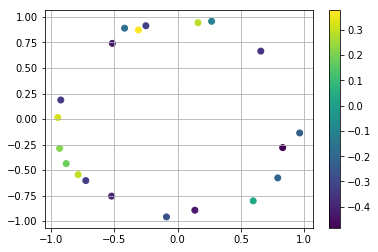

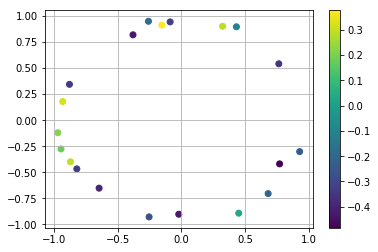

In [7]:
from astropy.coordinates import UnitSphericalRepresentation
from astropy.coordinates.matrix_utilities import rotation_matrix, matrix_product

stellar_inclination = 0
rotate_angle = 10
n_spots = 20
spots = [Spot.from_sunspot_distribution(stellar_inclination=stellar_inclination, contrast=0,
                                        radius_multiplier=10)
         for i in range(n_spots)]
positions = np.array([[s.x for s in spots], [s.y for s in spots], [s.z for s in spots]])
a = plt.scatter([s.x for s in spots], [s.y for s in spots], c=[s.z for s in spots])
plt.colorbar(a)
plt.grid()

remove_is = rotation_matrix(-stellar_inclination, 'x')
rotate = rotation_matrix(rotate_angle, axis='z')
add_is = rotation_matrix(stellar_inclination, 'x')

matrix_transform = matrix_product(remove_is, rotate, add_is)
from astropy.coordinates import CartesianRepresentation
c = CartesianRepresentation(x=[s.x for s in spots], y=[s.y for s in spots], z=[s.z for s in spots])
rotated = c.transform(matrix_transform)

plt.figure()
a = plt.scatter([r.x.value for r in rotated], [r.y.value for r in rotated], c=[r.z.value for r in rotated])
plt.colorbar(a)

plt.grid()

In [8]:
# # Draw spots from the sunspot distribution
# n_spots = 16
# stellar_inclination = 90
# spots = [Spot.from_sunspot_distribution(stellar_inclination=stellar_inclination, contrast=0.7, 
#                                         radius_multiplier=5) 
#          for i in range(n_spots)]
# sun = Star(spots=spots)

# n_steps = 15
# for rotation_angle in u.Quantity(np.ones(n_steps)*2*np.pi/n_steps, u.rad):
#     sun.rotate(stellar_inclination, rotation_angle)
#     sun.plot(n=1000)
#     plt.show()

In [10]:
# from astropy.coordinates import UnitSphericalRepresentation
# from astropy.coordinates.matrix_utilities import rotation_matrix, matrix_product

# longitude = 0*u.deg
# latitude = 90*u.deg

# for stellar_inclination in np.linspace(0, 90):
#     c = UnitSphericalRepresentation(longitude, latitude)
#     cartesian = c.to_cartesian()

#     rotate_about_z = rotation_matrix(90*u.deg, axis='z')
#     rotate_is = rotation_matrix(stellar_inclination*u.deg, axis='y')
# #    transform_matrix = matrix_product(rotate_about_z, rotate_is)
#     rotate_is2 = rotation_matrix(-stellar_inclination*u.deg, axis='y')
#     transform_matrix = matrix_product(rotate_about_z, rotate_is, rotate_is2)
#     cartesian = cartesian.transform(transform_matrix)
#     plt.scatter(cartesian.x.value, cartesian.y.value)

In [18]:
# stellar_inclination = 0

# spots = [Spot.from_latlon(15, 0, stellar_inclination, 0.1), 
#          Spot.from_latlon(-15, 120, stellar_inclination, 0.1),
#          Spot.from_latlon(15, 240, stellar_inclination, 0.1)]

# star = Star(inclination=stellar_inclination, spots=spots)
# for inc in [0, 45, 90]:
#     star.inclination = -inc
#     for i in [15, 15, 15]: 
#         star.rotate(i*u.deg)
#         ax = star.plot(n=500)
#         ax.set_title(inc)
#         plt.show()

In [8]:
stellar_inclinations = np.linspace(0, 90, 10)
n_rotation_steps = 30
n_rotations = 5
rotation_angles = np.ones(n_rotation_steps * n_rotations) * 2*np.pi / n_rotation_steps * u.rad
n_spots = 2

total_fluxes = []
all_centroids = []

stellar_inclination = 0

spots = [Spot.from_sunspot_distribution(stellar_inclination=stellar_inclination, contrast=0,
                                        radius_multiplier=10)
         for i in range(n_spots)]

star = Star(inclination=stellar_inclination, spots=spots)

for stellar_inclination in stellar_inclinations:
    total_flux = []
    centroids = []
    
    star.inclination = stellar_inclination

    for rotation_angle in rotation_angles:
    
        star.rotate(rotation_angle)
        x_c, y_c, analytic_flux = star._centroid_analytic(return_total_flux=True)
        
#         ax = star.plot(n=1000, col_exaggerate=500)
#         ax.set_title("$i_s = {0},\, \phi={1}$".format(stellar_inclination, rotation_angle))
#         plt.show()
        
        total_flux.append(analytic_flux)
        centroids.append([x_c, y_c])

    all_centroids.append(centroids)
    total_fluxes.append(total_flux)
    
all_centroids = np.array(all_centroids)

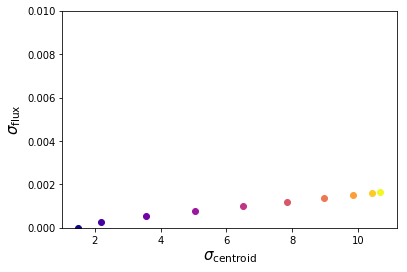

In [9]:
divisor = 1e-4
cmap = lambda inc: plt.cm.plasma(float(inc)/90)

for i, i_s in enumerate(stellar_inclinations):
    x = np.std(all_centroids[i, :, 0]/divisor)
    y = np.std(total_fluxes[i]/np.median(total_fluxes[i]))
    plt.scatter(x, y, label='$i_\star = {0:d}$'.format(int(i_s)), c=cmap(i_s))
    #plt.annotate("$i_s = {0:d}$".format(int(i_s)), 
    #             xy=(x-0.01, y), ha='right', va='center')

plt.xlabel('$\sigma_{\mathrm{centroid}}$', fontsize=15)
plt.ylabel('$\sigma_{\mathrm{flux}}$', fontsize=15)
plt.ylim([-1e-5, 0.01])
plt.show()

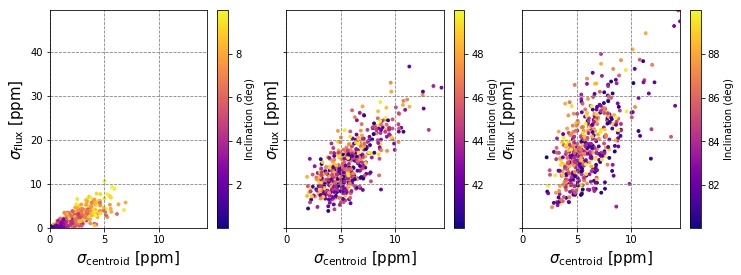

In [161]:
#stellar_inclinations = np.linspace(0, 90, 10)
n_rotation_steps = 15
n_rotations = 1
rotation_angles = np.ones(n_rotation_steps * n_rotations) * 2*np.pi / n_rotation_steps * u.rad
n_spots = 1
stellar_inclination = 0
n_stars = 500

inclinations = [0, 40, 80]

fig, ax = plt.subplots(1, len(inclinations), figsize=(12, 4), sharex=True, sharey=True)

for p, i0 in enumerate(inclinations):
    sigma_flux = []
    sigma_astrometry = []
    inclinations = []
    for _ in range(n_stars):
        stellar_inclination = 10 * np.random.rand() + i0
        inclinations.append(stellar_inclination)
        spots = [Spot.from_sunspot_distribution(stellar_inclination=stellar_inclination, 
                                                contrast=0.7)
                 for i in range(n_spots)]

        star = Star(inclination=stellar_inclination, spots=spots)

        total_flux = []
        centroids = []

        star.inclination = stellar_inclination

        for rotation_angle in rotation_angles:

            star.rotate(rotation_angle)
            x_c, y_c, analytic_flux = star._centroid_analytic(return_total_flux=True)
            total_flux.append(analytic_flux)
            centroids.append([x_c, y_c])

        centroids = np.array(centroids)
        centroid_vector = np.sqrt(centroids[:, 0]**2 + centroids[:, 1]**2)
        sigma_astrometry.append(np.std(centroid_vector))
        total_flux = np.array(total_flux)
        sigma_flux.append(np.std(total_flux/np.median(total_flux)))

    sigma_flux = np.array(sigma_flux)
    sigma_astrometry = np.array(sigma_astrometry)

    c = ax[p].scatter(1e6*sigma_astrometry, 1e6*sigma_flux, c=inclinations,
                      label='$i_\star = {0:d}$'.format(int(i_s)), cmap=plt.cm.plasma, 
                      s=8)
    plt.colorbar(c, ax=ax[p], label='Inclination (deg)')
    ax[p].set_xlabel('$\sigma_{\mathrm{centroid}}$ [ppm]', fontsize=15)
    ax[p].set_ylabel('$\sigma_{\mathrm{flux}}$ [ppm]', fontsize=15)
    ax[p].set_ylim([0, 1e6*sigma_flux.max()])
    ax[p].set_xlim([0, 1e6*sigma_astrometry.max()])
    ax[p].grid(ls='--', color='gray')
fig.savefig('plots/population_inclination.pdf', bbox_inches='tight')
plt.show()

In [64]:
#stellar_inclinations = np.linspace(0, 90, 10)
n_rotation_steps = 15
n_rotations = 1
rotation_angles = np.ones(n_rotation_steps * n_rotations) * 2*np.pi / n_rotation_steps * u.rad
n_spots = 2
stellar_inclination = 0
n_stars = 10000

#fig, ax = plt.subplots(1, 1, figsize=(6, 4), sharex=True, sharey=True)

sigma_flux = []
sigma_astrometry = []
inclinations = []

force_recompute = True

if force_recompute: 
    for _ in range(n_stars):
        stellar_inclination = 90 * np.random.rand()
        inclinations.append(stellar_inclination)
        spots = [Spot.from_sunspot_distribution(stellar_inclination=stellar_inclination, 
                                                contrast=0.7)
                 for i in range(n_spots)]

        star = Star(inclination=stellar_inclination, spots=spots)

        total_flux = []
        centroids = []

        star.inclination = stellar_inclination

        for rotation_angle in rotation_angles:

            star.rotate(rotation_angle)
            x_c, y_c, analytic_flux = star._centroid_analytic(return_total_flux=True)
            total_flux.append(analytic_flux)
            centroids.append([x_c, y_c])

        centroids = np.array(centroids)
        centroid_vector = np.sqrt(centroids[:, 0]**2 + centroids[:, 1]**2)
        sigma_astrometry.append(np.std(centroid_vector))
        total_flux = np.array(total_flux)
        sigma_flux.append(np.std(total_flux/np.median(total_flux)))

    sigma_flux = np.array(sigma_flux)
    sigma_astrometry = np.array(sigma_astrometry)

    np.save('simulation.npy', np.vstack([sigma_astrometry, sigma_flux, inclinations]).T)
else: 
    sigma_astrometry, sigma_flux, inclinations = np.load('simulation.npy', unpack=True)

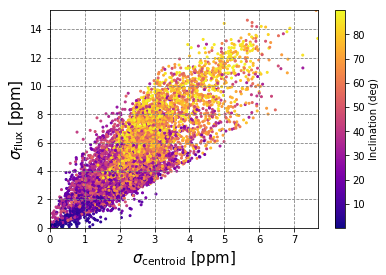

In [65]:
c = plt.scatter(1e6*sigma_astrometry, 1e6*sigma_flux, c=inclinations,
                label='$i_\star = {0:d}$'.format(int(i_s)), cmap=plt.cm.plasma, 
                s=4)
plt.colorbar(c, label='Inclination (deg)')
plt.xlabel('$\sigma_{\mathrm{centroid}}$ [ppm]', fontsize=15)
plt.ylabel('$\sigma_{\mathrm{flux}}$ [ppm]', fontsize=15)
plt.ylim([0, 1e6*sigma_flux.max()])
plt.xlim([0, 1e6*sigma_astrometry.max()])
plt.grid(ls='--', color='gray')
plt.savefig('plots/population_inclination.pdf', bbox_inches='tight')
plt.show()

In [66]:
inclinations = np.array(inclinations)
bins = np.arange(0, 100, 10)
inclination_labels = np.zeros_like(inclinations)

for i in range(len(bins)-1):
    min_bin = bins[i]
    max_bin = bins[i+1]
    in_bin = np.where((min_bin < inclinations) & (inclinations < max_bin))[0]
    inclination_labels[in_bin] = i

In [67]:
import numpy as np
from sklearn import linear_model
from sklearn.svm import SVC, LinearSVC

X = np.vstack([sigma_astrometry * 1e6, sigma_flux * 1e6]).T
y = inclination_labels

#clf = LinearSVC() #kernel='rbf')
clf = SVC(kernel='poly', degree=2)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
n_samples = 500
random_samples = np.vstack([5 * np.random.rand(n_samples),
                            10 * np.random.rand(n_samples)]).T
inc_bins = clf.predict(random_samples)
x, y = np.meshgrid(np.linspace(0, 15, n_samples), np.linspace(0, 40, n_samples))
inc_grids = clf.predict(np.vstack([x.ravel(), y.ravel()]).T)

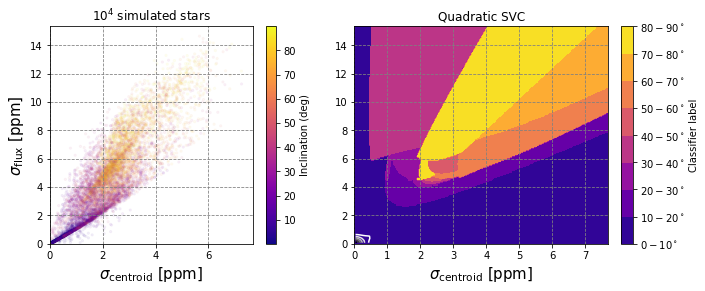

In [69]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.ndimage import gaussian_filter

new_shape = x.shape 
inc_grids.resize(new_shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

c = ax[0].scatter(1e6*sigma_astrometry, 1e6*sigma_flux, c=inclinations,
                  label='$i_\star = {0:d}$'.format(int(i_s)), cmap=plt.cm.plasma, 
                  s=5, alpha=0.05)
cbar = plt.colorbar(c, ax=ax[0], label='Inclination (deg)')
cbar.solids.set(alpha=1)

cont = plt.contourf(x, y, inc_grids, cmap=plt.cm.plasma)

axins = inset_axes(ax[1],
           width="5%", # width = 10% of parent_bbox width
           height="100%", # height : 50%
           loc=6,
           bbox_to_anchor=(1.05, 0., 1, 1),
           bbox_transform=ax[1].transAxes,
           borderpad=0,
       )

cbar = plt.colorbar(cont, cax=axins, label='Classifier label')
labels = ["${0}-{1}^\circ$".format(int(i*10), int((i + 1)*10)) 
          for i in cbar.get_ticks()]
cbar.set_ticklabels(labels)

# ax[1].scatter(1e6*sigma_astrometry, 1e6*sigma_flux,
#               label='$i_\star = {0:d}$'.format(int(i_s)), 
#               color='w', s=1, alpha=0.05)

img, xbins, ybins = np.histogram2d(1e6*sigma_astrometry, 1e6*sigma_flux, bins=100)#bins=100)
xbincenters = 0.5*(xbins[1:] + xbins[:-1])
ybincenters = 0.5*(ybins[1:] + ybins[:-1])

filtered = gaussian_filter(img.T, 2)
c = ax[1].contour(xbincenters, ybincenters, filtered, cmap=plt.cm.Greys)

ax[0].set_ylabel('$\sigma_{\mathrm{flux}}$ [ppm]', fontsize=15)
ax[0].set_title('$10^4$ simulated stars')
ax[1].set_title('Quadratic SVC')

for axis in ax:
    axis.set_xlabel('$\sigma_{\mathrm{centroid}}$ [ppm]', fontsize=15)
    axis.set_ylim([0, 1e6*sigma_flux.max()])
    axis.set_xlim([0, 1e6*sigma_astrometry.max()])
    axis.grid(ls='--', color='gray')
fig.savefig('plots/classifier.pdf', bbox_inches='tight')

Text(0,0.5,'$\\sigma_{\\mathrm{flux}}$ [ppm]')

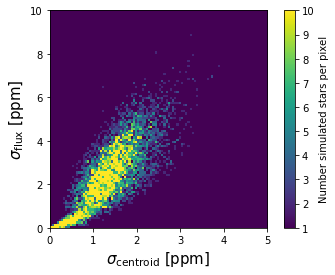

In [60]:
img, xbins, ybins = np.histogram2d(1e6*sigma_astrometry, 1e6*sigma_flux, bins=100)
xbincenters = 0.5*(xbins[1:] + xbins[:-1])
ybincenters = 0.5*(ybins[1:] + ybins[:-1])

c = plt.imshow(img.T, origin='lower', vmin=1, vmax=10, extent=[0, 5, 0, 10], aspect=0.5)
plt.colorbar(c, label='Number simulated stars per pixel')
plt.xlabel('$\sigma_{\mathrm{centroid}}$ [ppm]', fontsize=15)
plt.ylabel('$\sigma_{\mathrm{flux}}$ [ppm]', fontsize=15)